In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [3]:
def get_csv(path):
    data = []
    if os.path.exists(path + '/version_2/metrics.csv'):
        data.append(pd.read_csv(path + '/version_2/metrics.csv'))
    if os.path.exists(path + '/version_1/metrics.csv'):
        data.append(pd.read_csv(path + '/version_1/metrics.csv'))
    if os.path.exists(path + '/version_0/metrics.csv'):
        data.append(pd.read_csv(path + '/version_0/metrics.csv'))
    return data

In [10]:
def single_timeseries(data, col='val/acc'):
    frames = [x[~x[col].isnull()][['step', col]] for x in data]
    return pd.concat(frames)

def merged_timeseries(data_1, data_2, col='val/acc'):
    frames_1 = [x[~x[col].isnull()][['step', col]] for x in data_1]
    frames_2 = [x[~x[col].isnull()][['step', col]] for x in data_2]
    frames_1 = [x.assign(Experiment = name_1) for x in frames_1]
    frames_2 = [x.assign(Experiment = name_2) for x in frames_2]
    return pd.concat([pd.concat(frames_1), pd.concat(frames_2)])

In [44]:
root_path = '/home/vinay/Documents/gln-thesis/RESULTS'

dir_1 = root_path + '/gln_16-16-1_deskewedfashionmnist'
dir_2 = root_path + '/dgn_16-16-1_originalfashionmnist'
name_1 = 'GLN'
name_2 = 'DGN'

data_1 = []
data_2 = []
for i in range(10):
    csv_1 = get_csv(dir_1 + '/' + str(i))
    data_1 += csv_1
    csv_2 = get_csv(dir_2 + '/' + str(i))
    data_2 += csv_2


In [37]:
print(len(data_2))

8


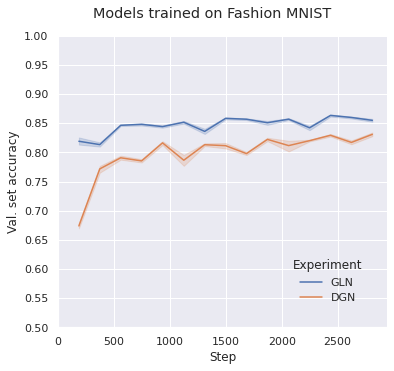

In [45]:
timeseries = merged_timeseries(data_1, data_2)
# timeseries = single_timeseries(data_1)

plot = sns.relplot(x="step", y="val/acc", kind="line", hue="Experiment", data=timeseries)
plot.fig.suptitle('Models trained on Fashion MNIST')
plot.fig.subplots_adjust(top=0.9, right=0.9);
plot.set_ylabels("Val. set accuracy", clear_inner=False)
plot.set_xlabels("Step", clear_inner=False)
plot.set(xticks=[i for i in range(0, max(timeseries['step']) + 100, 500)])
leg = plot._legend
leg.set_bbox_to_anchor([0.85, 0.25])
plot.set(yticks=np.linspace(0.50, 1.0, 11))
